#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [25]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [26]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [27]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [28]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [29]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [31]:
model = Sequential()

In [32]:
#卷積層1

In [33]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [34]:
model.add(Dropout(rate=0.25))

In [35]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [36]:
#卷積層2與池化層2

In [37]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [38]:
model.add(Dropout(0.25))

In [39]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [41]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [42]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [43]:
model.add(Dense(10, activation='softmax'))

In [44]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [45]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [46]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])


In [47]:
train_history_cate=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 113us/step - loss: 0.0698 - acc: 0.4349 - val_loss: 0.0615 - val_acc: 0.5480
Epoch 2/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.0555 - acc: 0.5758 - val_loss: 0.0535 - val_acc: 0.6322
Epoch 3/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.0499 - acc: 0.6293 - val_loss: 0.0511 - val_acc: 0.6536
Epoch 4/12
37500/37500 [==============================] - 4s 98us/step - loss: 0.0459 - acc: 0.6617 - val_loss: 0.0477 - val_acc: 0.6560
Epoch 5/12
37500/37500 [==============================] - 4s 100us/step - loss: 0.0425 - acc: 0.6916 - val_loss: 0.0461 - val_acc: 0.6772
Epoch 6/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.0390 - acc: 0.7204 - val_loss: 0.0429 - val_acc: 0.6957
Epoch 7/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.0360 - acc: 0.7433 - val_loss: 0.0412 - val_a

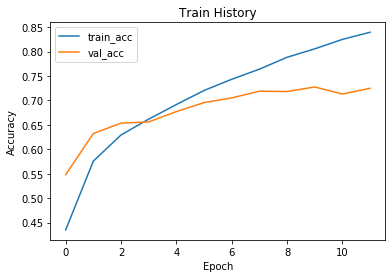

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history_cate ,train_acc,test_acc):
    plt.plot(train_history_cate.history[train_acc])
    plt.plot(train_history_cate.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history(train_history_cate ,'acc','val_acc')

W0707 15:49:58.687660 140487351457600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 118us/step - loss: 0.0803 - acc: 0.9730 - val_loss: 0.1270 - val_acc: 0.9517
Epoch 2/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0717 - acc: 0.9750 - val_loss: 0.1267 - val_acc: 0.9517
Epoch 3/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0644 - acc: 0.9779 - val_loss: 0.1240 - val_acc: 0.9529
Epoch 4/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0577 - acc: 0.9795 - val_loss: 0.1260 - val_acc: 0.9522
Epoch 5/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0517 - acc: 0.9819 - val_loss: 0.1260 - val_acc: 0.9523
Epoch 6/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0476 - acc: 0.9830 - val_loss: 0.1286 - val_acc: 0.9518
Epoch 7/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.0433 - acc: 0.9845 - val_loss: 0.1278 - 

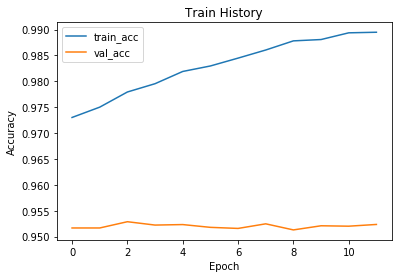

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_binary=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  
show_train_history(train_history_binary ,'acc','val_acc')